# 시작하기 전 환경 구성

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.5/496.5 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 25.8 MB/s eta 0:00:00


In [3]:
import torch
print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [4]:
!nvidia-smi

Tue Mar 14 04:31:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Content 경로 변수 선정정
import os
HOME = os.getcwd()
print(HOME)

/content


# YOLO8 설치

In [6]:
# Git clone method (for development)

!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
!pip install -r requirements.txt  # install

Cloning into 'ultralytics'...
remote: Enumerating objects: 6371, done.
remote: Counting objects: 100% (618/618), done.
remote: Compressing objects: 100% (358/358), done.
remote: Total 6371 (delta 379), reused 442 (delta 259), pack-reused 5753
Receiving objects: 100% (6371/6371), 4.86 MiB | 12.19 MiB/s, done.
Resolving deltas: 100% (4276/4276), done.
/content/ultralytics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 25.5/166.8 GB disk)


# 데이터셋 로드

In [7]:
%pwd

'/content/ultralytics'

In [ ]:
# %cd /content
# # 커스텀 데이터 다운로드
# '''
#   /content
#   - (D)train
#   - (D)test
#   - (D)vaild
#   - (F)README.dataset.txt
#   - (F)README.roboflow.txt
#   - (F)data.yaml
# '''
# !curl -L "https://universe.roboflow.com/ds/QbhuT94GRc?key=zVEx8j1qce" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [9]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [10]:
!mkdir /content/datasets
%cd /content/datasets

/content/datasets


In [11]:
from roboflow import Roboflow
rf = Roboflow(api_key="zYeBbMZETHu4zRhPC2FT")
project = rf.workspace("yunnan-university").project("synthetic-fire-smoke")
dataset = project.version(14).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.53, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to synthetic-fire-smoke-14 in yolov8:: 100%|██████████| 10164/10164 [00:01<00:00, 6853.75it/s]


In [12]:
# 데이터 셋 백업 
!cp -r /content/datasets/synthetic-fire-smoke-14 /content/drive/MyDrive/동엽

# 모델 구조 및 확인

In [ ]:
# import yaml
# with open("data.yaml", 'r') as stream:
#   num_classes = str(yaml.safe_load(stream))

In [ ]:
# %cat /content/ultralytics/ultralytics/models/v8/yolov8x6.yaml

# 커스텀 데이터 셋 학습

In [13]:
%pwd

'/content/datasets'

In [14]:
%cd /content

/content


In [15]:
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

100% 131M/131M [00:02<00:00, 52.7MB/s]
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/datasets/synthetic-fire-smoke-14/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript,

In [16]:
# 가중치 및 결과 파일 백업
!cp -r /content/ultralytics/runs/detect/train /content/drive/MyDrive/동엽

In [17]:
!ls /content/ultralytics/runs/detect/train

args.yaml					    train_batch11240.jpg
confusion_matrix.png				    train_batch11241.jpg
events.out.tfevents.1678769914.7fa6547ecd16.8105.0  train_batch11242.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights


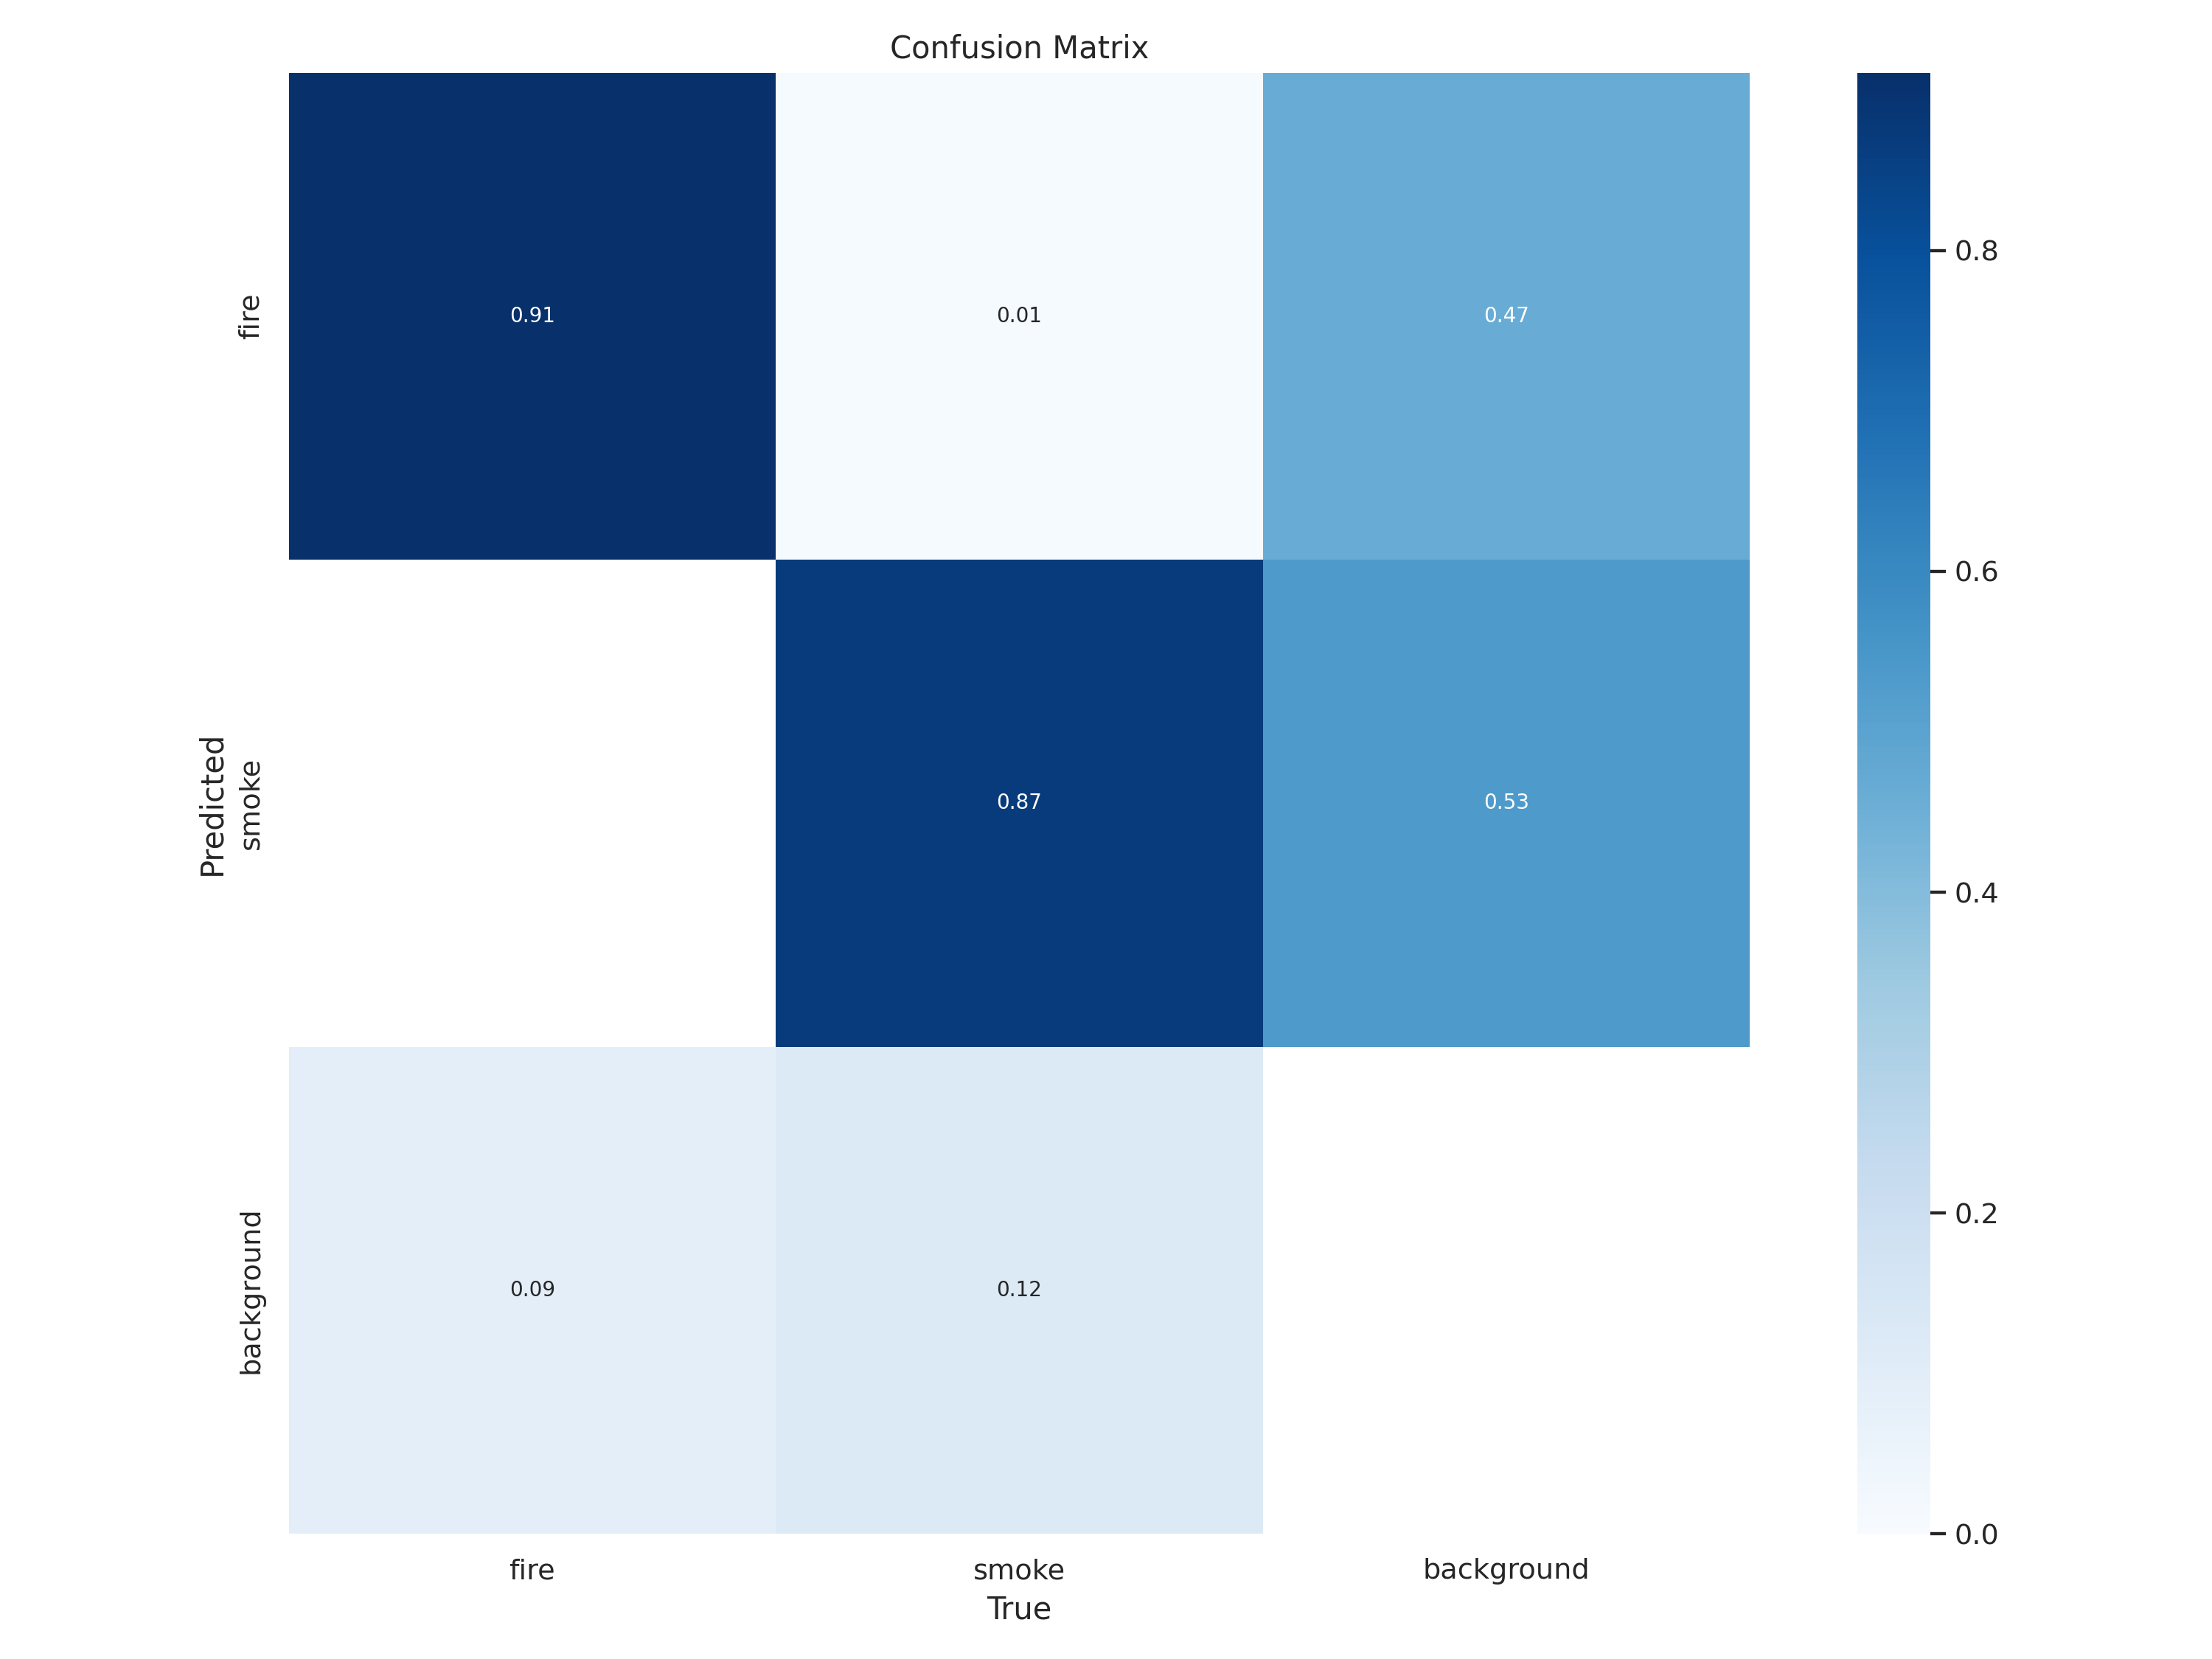

In [22]:
from IPython.display import display, Image

Image(filename=f'/content/ultralytics/runs/detect/train/confusion_matrix.png')

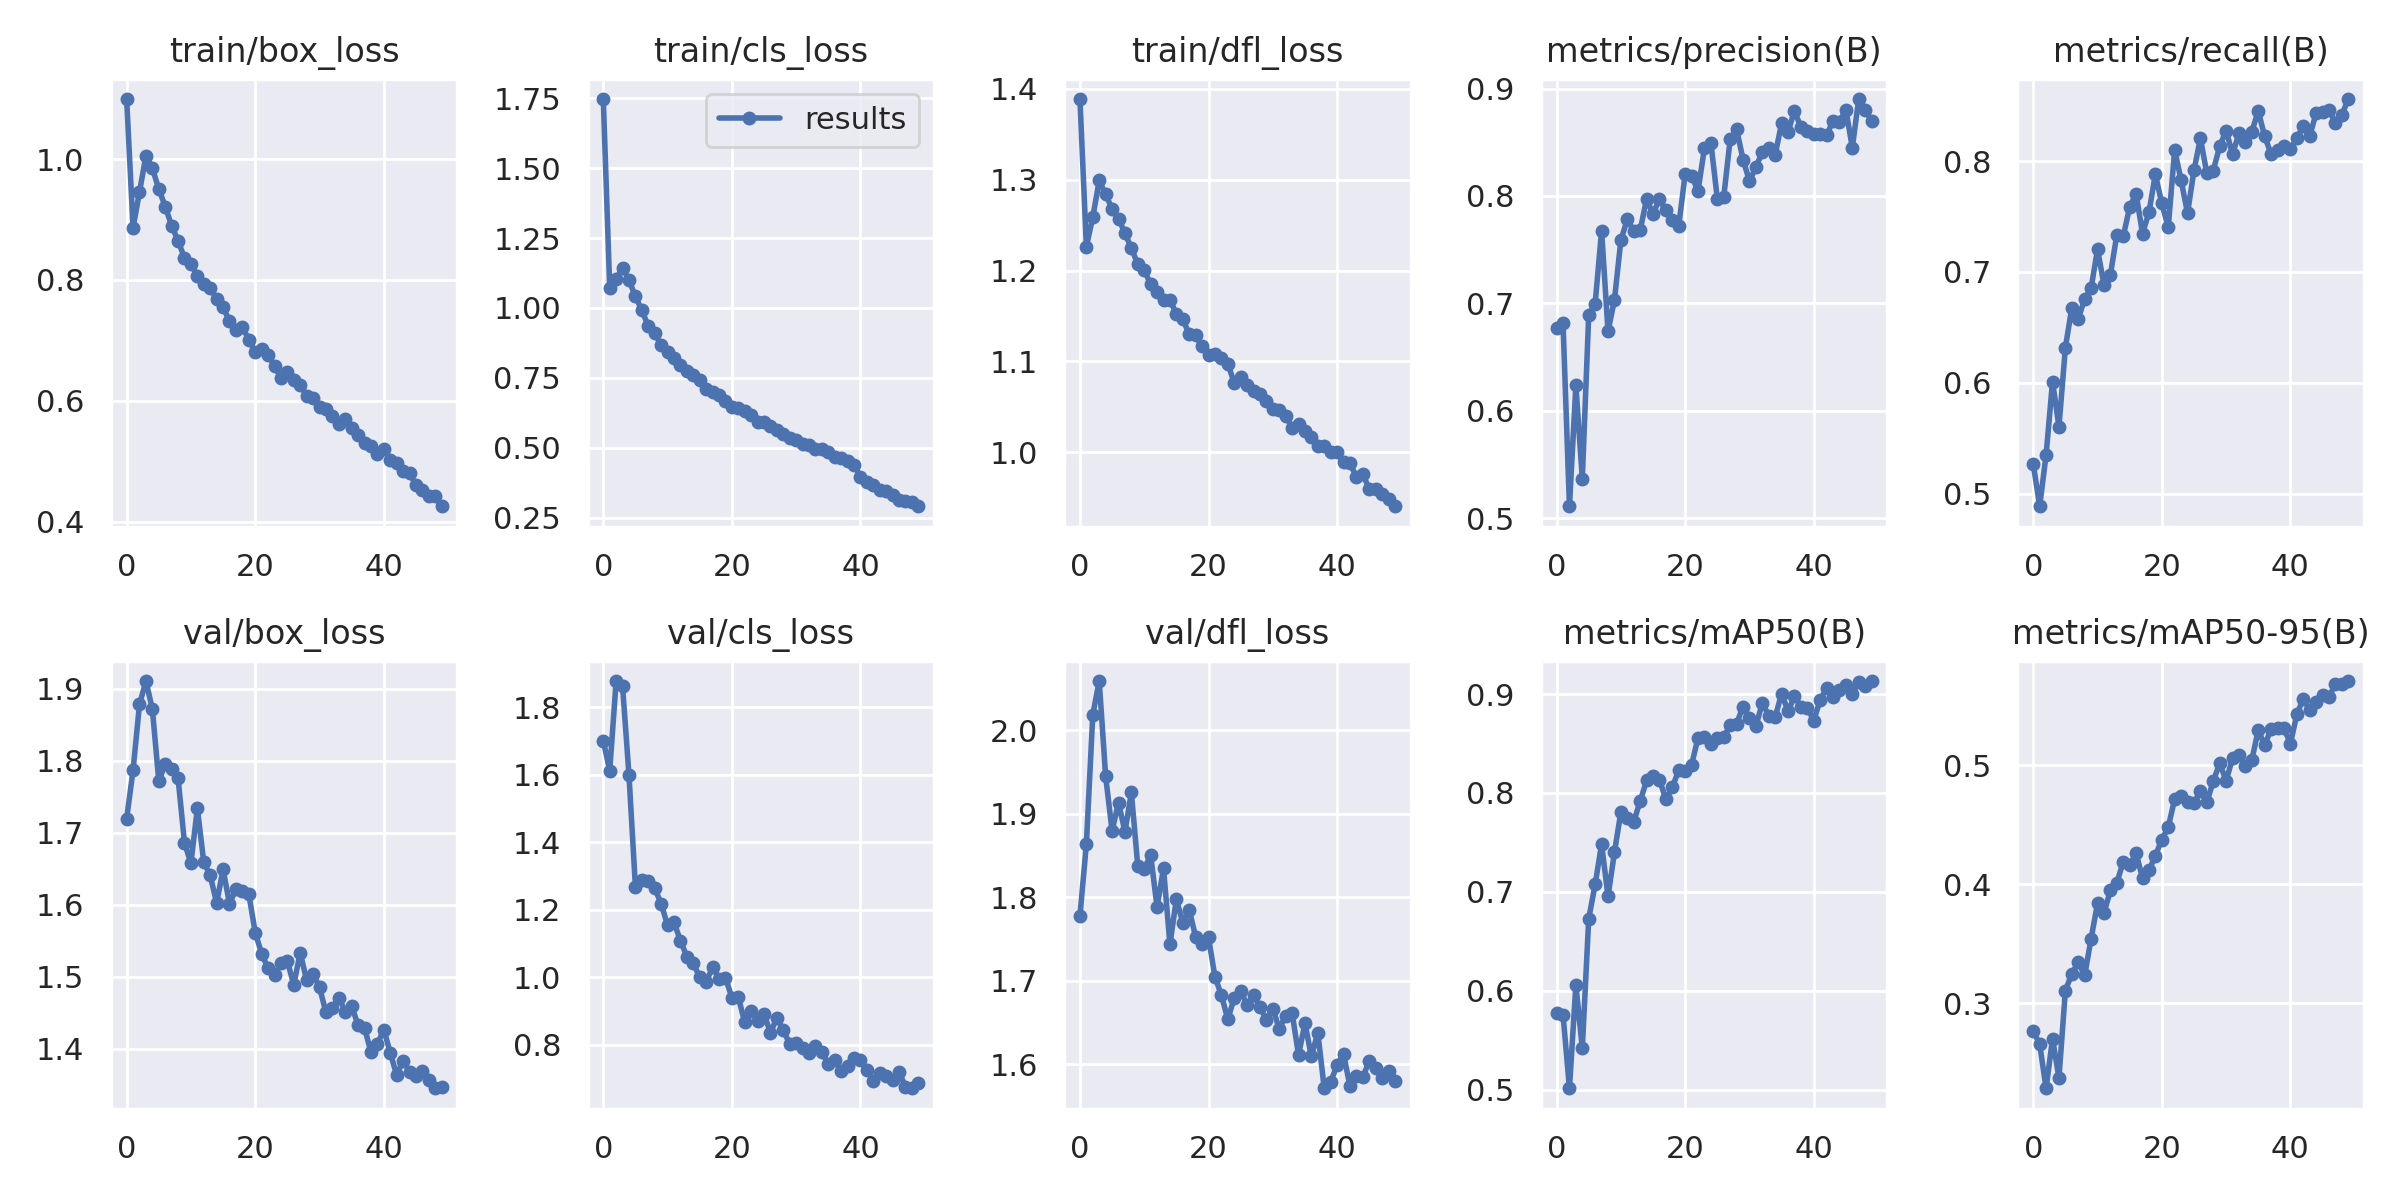

In [24]:
Image(filename=f'/content/ultralytics/runs/detect/train/results.png', width=600)

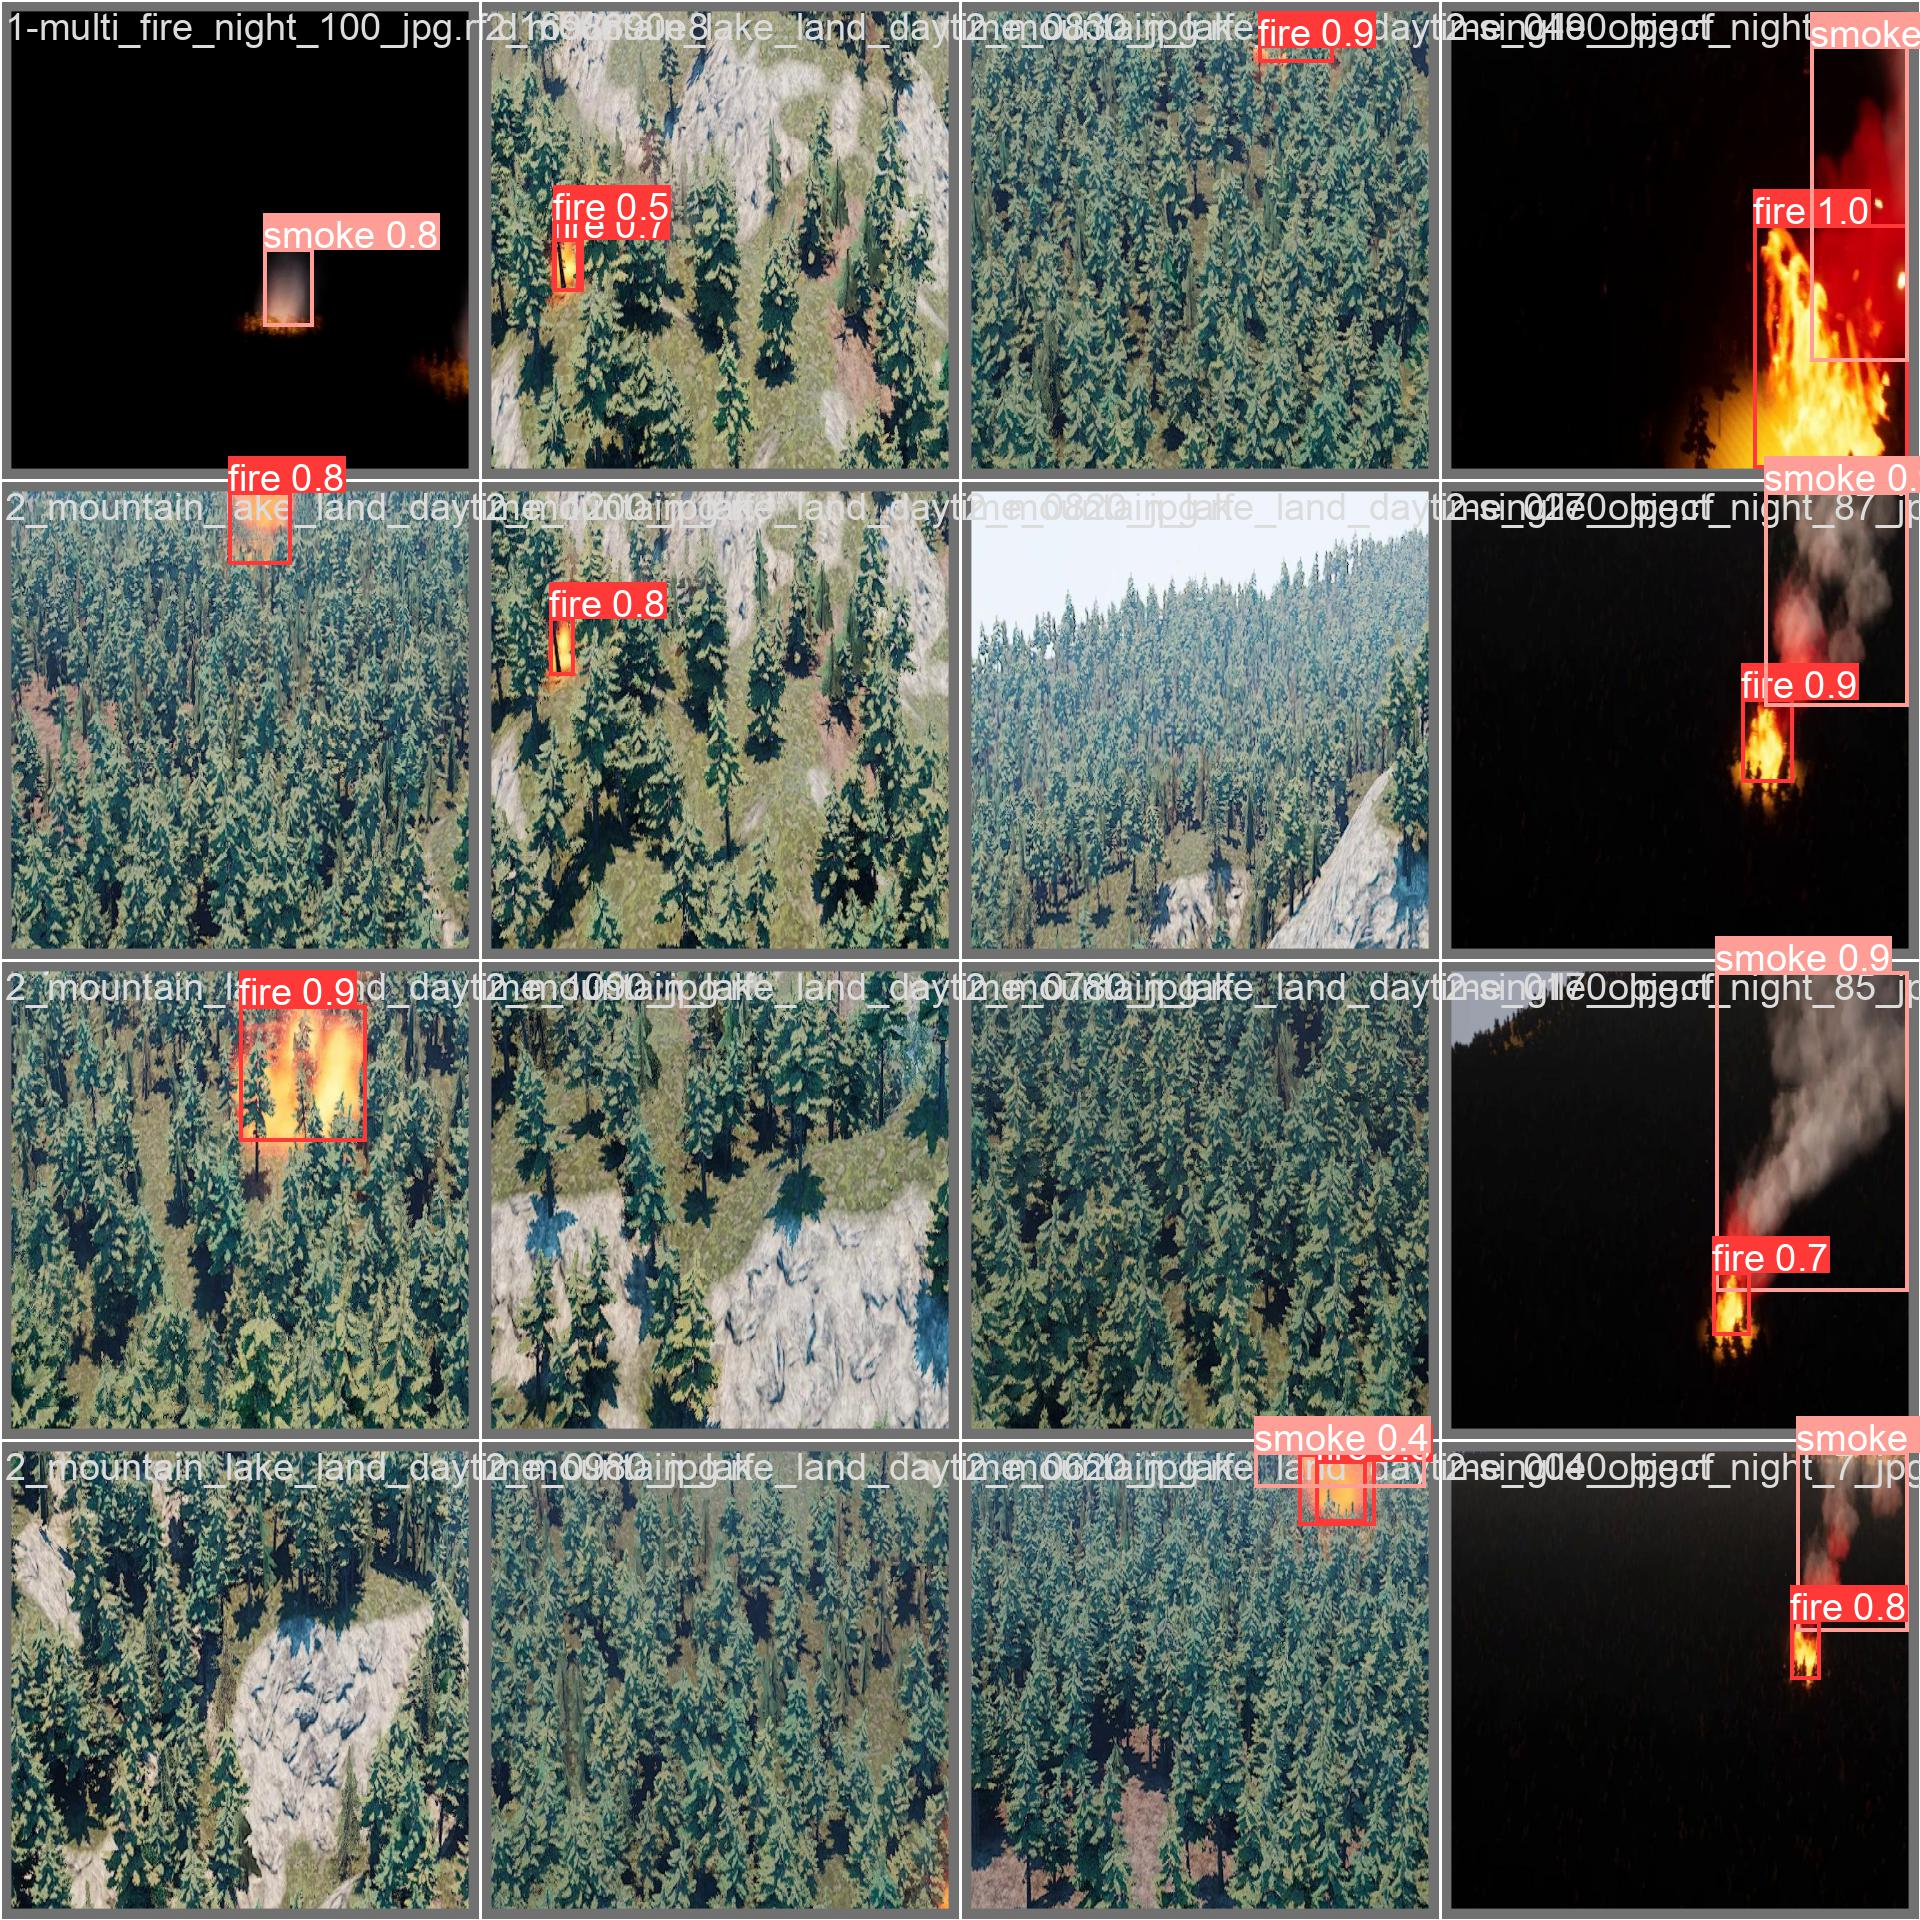

In [25]:
Image(filename=f'/content/ultralytics/runs/detect/train/val_batch0_pred.jpg', width=600)

# 모델 평가

In [26]:
!yolo task=detect mode=predict model=/content/ultralytics/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs

image 1/210 /content/datasets/synthetic-fire-smoke-14/test/images/1-multi_fire_night_102_jpg.rf.99c3a9356a7aed3573291a2c468a74a9.jpg: 640x640 1 smoke, 81.3ms
image 2/210 /content/datasets/synthetic-fire-smoke-14/test/images/1-multi_fire_night_105_jpg.rf.845d777c951bee671771ed1838852795.jpg: 640x640 1 smoke, 54.9ms
image 3/210 /content/datasets/synthetic-fire-smoke-14/test/images/1-multi_fire_night_106_jpg.rf.b192b3224a3946297de6c5d79e7b2002.jpg: 640x640 1 fire, 2 smokes, 55.3ms
image 4/210 /content/datasets/synthetic-fire-smoke-14/test/images/1-multi_fire_night_17_jpg.rf.a2b495279d99e126fce4742791c88a09.jpg: 640x640 1 fire, 1 smoke, 53.7ms
image 5/210 /content/datasets/synthetic-fire-smoke-14/test/images/1-multi_fire_night_2_jpg.rf.b915ae345649ac3fa46aa891c91b7345.jpg: 640x640 1 fire, 2 smokes, 54.2ms
image 6/210 /cont

# 예측

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/ultralytics/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [32]:
# 예측 결과 파일 백업
!cp -r /content/ultralytics/runs/detect/predict /content/drive/MyDrive/동엽